In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
# Import data into pandas from CSV
file='StationNeighborhoodPriceAction.csv'
df = pd.read_csv(file)
df.head()

,Unnamed: 0,-1,1,-2,2,-3,3,-4,4,-5,...,-10,10,-11,11,-12,12,0,RegionName,start_station,start_month
0,1,571400.0,579000.0,570200.0,581400.0,570400.0,584800.0,569100.0,587600.0,567600.0,...,559600.0,603300.0,555600.0,597600.0,548500.0,589700.0,575300.0,Columbia Heights,14th+&+girard+st+nw,2016-05
1,2,406700.0,404800.0,408100.0,408800.0,411000.0,410500.0,411900.0,405600.0,408700.0,...,381800.0,396100.0,382700.0,398700.0,381300.0,400700.0,405400.0,Columbia Heights,14th+&+harvard+st+nw,2010-09
2,3,581400.0,587600.0,579000.0,589000.0,575300.0,590700.0,571400.0,591600.0,570200.0,...,564600.0,585700.0,562200.0,585400.0,560900.0,583700.0,584800.0,Columbia Heights,14th+&+irving+st+nw,2016-08
3,4,406700.0,404800.0,408100.0,408800.0,411000.0,410500.0,411900.0,405600.0,408700.0,...,381800.0,396100.0,382700.0,398700.0,381300.0,400700.0,405400.0,Columbia Heights,14th+st+&+spring+rd+nw,2010-09
4,5,453800.0,463800.0,452500.0,469100.0,451200.0,472600.0,449200.0,476800.0,446800.0,...,428300.0,499500.0,424100.0,504100.0,419100.0,508400.0,457800.0,Columbia Heights,15th+&+euclid+st++nw,2013-05


In [60]:
#Average before and after a year each station's start date
avg_before = df.groupby(['RegionName']).mean()['-12']
avg_after = df.groupby(['RegionName']).mean()['12']
by_region = df['RegionName'].value_counts()
b4_after_df=pd.DataFrame({'NumberOfStation': by_region,
                         'Average Price 1 Year Before': avg_before,
                         'Average Price 1 Yr After': avg_after})
b4_after_df.index.name = 'RegionName'
b4_after_df.reset_index()
b4_after_df.head()

,Average Price 1 Year Before,Average Price 1 Yr After,NumberOfStation
RegionName,,,
Adams Morgan,4.473333e+05,4.736333e+05,6
Anacostia,1.925000e+05,1.895000e+05,2
Barney Circle,4.483000e+05,4.794000e+05,1
Benning,1.853000e+05,1.735000e+05,1
Berkley,1.501600e+06,1.644900e+06,1


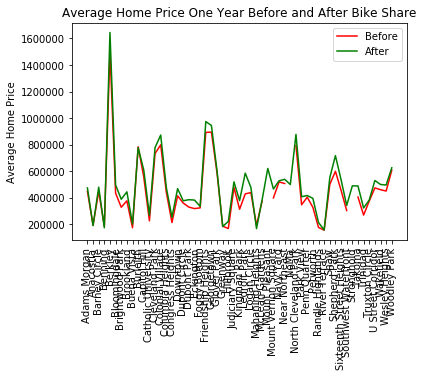

In [61]:
# Plot average price 1 year before and after
before, = plt.plot(b4_after_df.index, b4_after_df['Average Price 1 Year Before'], color="red", label="Before" )

# Plot the unemployment values for a single country
after, = plt.plot(b4_after_df.index, b4_after_df['Average Price 1 Yr After'], color="green", label="After" )

# Create a legend for our chart
plt.legend(handles=[before, after], loc="best")
plt.xticks(rotation=90)
plt.ylabel("Average Home Price")
plt.xlabel("")
plt.title("Average Home Price One Year Before and After Bike Share")
plt.savefig("BeforeAfterBikeShare.png")
# Show the chart
plt.show()

In [62]:
b4_after_df.to_csv("AvgHomePriceAndStationCount.csv")